# 金融数据分析与建模

## 课程内容

https://github.com/stefan-jansen/machine-learning-for-trading

* 机器学习,文本分析，神经网络
* 量化策略

## 现有的量化投资平台与数据获取

* 聚宽，米筐，优矿，bigquant,掘金等等，现状，backtrader

* 金融数据接口  akshare,tushare,baostock,掘金

* 另外股票数据也可以一次性购买。淘宝拼多多100~200块能拿到所有历史数据，总大小也不过几个G，离线使用可以摆脱不少平台接口限制。缺点就是数据需要更新。

https://zhuanlan.zhihu.com/p/219633414


## AkShare 

AkShare 是基于 Python 的开源金融数据接口库，目的是实现对股票、期货、期权、基金、外汇、债券、指数、数字货币等金融产品的基本面数据、实时和历史行情数据、衍生数据从数据采集、数据清洗、到数据落地的一套开源工具，满足金融数据科学家，数据科学爱好者在金融数据获取方面的需求。

AkShare 的特点是获取的是相对权威的金融数据网站公布的原始数据，广大数据科学家可以利用原始数据进行各数据源之间的交叉验证，进而再加工，从而得出科学的结论。

## 一些库的安装

外部数据源

pip install akshare -i https://mirrors.aliyun.com/pypi/simple

机器学习库

pip install scikit-learn -i https://mirrors.aliyun.com/pypi/simple

因子分析

pip install alphalens -i https://mirrors.aliyun.com/pypi/simple

可视化

pip install pyecharts -i https://mirrors.aliyun.com/pypi/simple

pip install seaborn -i https://mirrors.aliyun.com/pypi/simple

回测框架

pip install backtrader -i https://mirrors.aliyun.com/pypi/simple

如果无法作图可能需要安装: backtrader[plotting]

talib 量化指标（直接pip不行，需要用以下命令在终端安装）

conda install -c conda-forge ta-lib


### 数据的分类

* 行情数据（股票随时间变化的价格，所有行情相关数据都是时间序列数据）
* 财务数据（股票对应公司的财报数据）
* 其他数据

## classwork1

安装 pyecharts，talib，导入这两个库并截图

In [3]:
import pyecharts
import talib
import backtrader as bt
import alphalens as al
import seaborn as sns
import sklearn as sk
import akshare as ak
import pandas as pd

## 行情数据(单日数据)

* 开盘收盘最高最低

* 数据的精度

* 前后复权

https://www.akshare.xyz/index.html

股票数据复权

1.为何要复权：由于股票存在配股、分拆、合并和发放股息等事件，会导致股价出现较大的缺口。 若使用不复权的价格处理数据、计算各种指标，将会导致它们失去连续性，且使用不复权价格计算收益也会出现错误。 为了保证数据连贯性，常通过前复权和后复权对价格序列进行调整。

2.前复权：保持当前价格不变，将历史价格进行增减，从而使股价连续。 前复权用来看盘非常方便，能一眼看出股价的历史走势，叠加各种技术指标也比较顺畅，是各种行情软件默认的复权方式。 这种方法虽然很常见，但也有两个缺陷需要注意。

2.1 为了保证当前价格不变，每次股票除权除息，均需要重新调整历史价格，因此其历史价格是时变的。 这会导致在不同时点看到的历史前复权价可能出现差异。

2.2 对于有持续分红的公司来说，前复权价可能出现负值。

3.后复权：保证历史价格不变，在每次股票权益事件发生后，调整当前的股票价格。 后复权价格和真实股票价格可能差别较大，不适合用来看盘。 其优点在于，可以被看作投资者的长期财富增长曲线，反映投资者的真实收益率情况。

4.在量化投资研究中普遍采用后复权数据。

* 其他行情数据接口

In [12]:
help(ak.stock_zh_a_hist)

Help on function stock_zh_a_hist in module akshare.stock_feature.stock_hist_em:

stock_zh_a_hist(symbol: str = '000001', period: str = 'daily', start_date: str = '19700101', end_date: str = '20500101', adjust: str = '') -> pandas.core.frame.DataFrame
    东方财富网-行情首页-沪深京 A 股-每日行情
    https://quote.eastmoney.com/concept/sh603777.html?from=classic
    :param symbol: 股票代码
    :type symbol: str
    :param period: choice of {'daily', 'weekly', 'monthly'}
    :type period: str
    :param start_date: 开始日期
    :type start_date: str
    :param end_date: 结束日期
    :type end_date: str
    :param adjust: choice of {"qfq": "前复权", "hfq": "后复权", "": "不复权"}
    :type adjust: str
    :return: 每日行情
    :rtype: pandas.DataFrame



In [7]:
#中国平安 股票代码：000001
#注意不复权与复权的区别
stock_pinan = ak.stock_zh_a_hist(symbol="000001", period="daily", start_date="20170301", end_date='20230207', adjust="")
print(stock_pinan)

              日期     开盘     收盘     最高     最低      成交量           成交额    振幅  \
0     2017-03-01   9.49   9.49   9.55   9.47   346994  3.301580e+08  0.84   
1     2017-03-02   9.51   9.43   9.54   9.42   403629  3.823959e+08  1.26   
2     2017-03-03   9.41   9.40   9.43   9.36   342655  3.219525e+08  0.74   
3     2017-03-06   9.40   9.45   9.46   9.39   404511  3.812123e+08  0.74   
4     2017-03-07   9.44   9.45   9.46   9.40   294673  2.777474e+08  0.63   
...          ...    ...    ...    ...    ...      ...           ...   ...   
1439  2023-02-01  15.03  14.70  15.08  14.51  1653421  2.426472e+09  3.80   
1440  2023-02-02  14.74  14.60  14.78  14.27  1577900  2.280745e+09  3.47   
1441  2023-02-03  14.45  14.32  14.55  14.16  1246383  1.782106e+09  2.67   
1442  2023-02-06  14.10  14.00  14.13  13.86  1317610  1.838429e+09  1.89   
1443  2023-02-07  14.06  14.21  14.32  14.03   869460  1.235298e+09  2.07   

       涨跌幅   涨跌额   换手率  
0     0.11  0.01  0.21  
1    -0.63 -0.06  0.24  


In [37]:
stock_pinan

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,2017-03-01,9.49,9.49,9.55,9.47,346994,3.301580e+08,0.84,0.11,0.01,0.21
1,2017-03-02,9.51,9.43,9.54,9.42,403629,3.823959e+08,1.26,-0.63,-0.06,0.24
2,2017-03-03,9.41,9.40,9.43,9.36,342655,3.219525e+08,0.74,-0.32,-0.03,0.20
3,2017-03-06,9.40,9.45,9.46,9.39,404511,3.812123e+08,0.74,0.53,0.05,0.24
4,2017-03-07,9.44,9.45,9.46,9.40,294673,2.777474e+08,0.63,0.00,0.00,0.17
...,...,...,...,...,...,...,...,...,...,...,...
1439,2023-02-01,15.03,14.70,15.08,14.51,1653421,2.426472e+09,3.80,-1.93,-0.29,0.85
1440,2023-02-02,14.74,14.60,14.78,14.27,1577900,2.280745e+09,3.47,-0.68,-0.10,0.81
1441,2023-02-03,14.45,14.32,14.55,14.16,1246383,1.782106e+09,2.67,-1.92,-0.28,0.64
1442,2023-02-06,14.10,14.00,14.13,13.86,1317610,1.838429e+09,1.89,-2.23,-0.32,0.68


### 数据的选择与切片

* 显式索引，顺序索引

* 简单作图

In [8]:
stock_pinan.set_index("日期",inplace=True)

In [39]:
stock_pinan

,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
日期,,,,,,,,,,
2017-03-01,9.49,9.49,9.55,9.47,346994,3.301580e+08,0.84,0.11,0.01,0.21
2017-03-02,9.51,9.43,9.54,9.42,403629,3.823959e+08,1.26,-0.63,-0.06,0.24
2017-03-03,9.41,9.40,9.43,9.36,342655,3.219525e+08,0.74,-0.32,-0.03,0.20
2017-03-06,9.40,9.45,9.46,9.39,404511,3.812123e+08,0.74,0.53,0.05,0.24
2017-03-07,9.44,9.45,9.46,9.40,294673,2.777474e+08,0.63,0.00,0.00,0.17
...,...,...,...,...,...,...,...,...,...,...
2023-02-01,15.03,14.70,15.08,14.51,1653421,2.426472e+09,3.80,-1.93,-0.29,0.85
2023-02-02,14.74,14.60,14.78,14.27,1577900,2.280745e+09,3.47,-0.68,-0.10,0.81
2023-02-03,14.45,14.32,14.55,14.16,1246383,1.782106e+09,2.67,-1.92,-0.28,0.64


In [26]:
from matplotlib import rcParams
rcParams['font.family'] = 'SimHei'

In [51]:
#help(stock_pinan.loc["2021-05-15":"2023-01-20",["最高","最低"]].plot)

<AxesSubplot:xlabel='日期'>

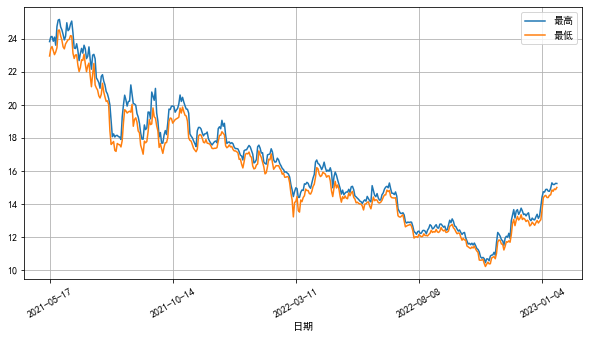

In [50]:
stock_pinan.loc["2021-05-15":"2023-01-20",["最高","最低"]].plot(style="-",figsize=(10,5),rot=30,grid=True)

In [41]:
stock_pinan["最高"]

日期
2017-03-01     9.55
2017-03-02     9.54
2017-03-03     9.43
2017-03-06     9.46
2017-03-07     9.46
              ...  
2023-02-01    15.08
2023-02-02    14.78
2023-02-03    14.55
2023-02-06    14.13
2023-02-07    14.32
Name: 最高, Length: 1444, dtype: float64

## classwork 2

* 读入 sh600050 中国联通的历史行情数据

* 做出2019年中国联通的每日开盘和收盘价的曲线图

## 基于pyecharts的k线图


更多的例子：

https://gallery.pyecharts.org/#/Candlestick/README

* k线图的基本意义


In [23]:
pyecharts.__version__

'1.8.1'

In [52]:
## 官网例子
from pyecharts import options as opts
from pyecharts.charts import Kline

data = [
    [2320.26, 2320.26, 2287.3, 2362.94],
    [2300, 2291.3, 2288.26, 2308.38],
    [2295.35, 2346.5, 2295.35, 2345.92],
    [2347.22, 2358.98, 2337.35, 2363.8],
    [2360.75, 2382.48, 2347.89, 2383.76],
    [2383.43, 2385.42, 2371.23, 2391.82],
    [2377.41, 2419.02, 2369.57, 2421.15],
    [2425.92, 2428.15, 2417.58, 2440.38],
    [2411, 2433.13, 2403.3, 2437.42],
    [2432.68, 2334.48, 2427.7, 2441.73],
    [2430.69, 2418.53, 2394.22, 2433.89],
    [2416.62, 2432.4, 2414.4, 2443.03],
    [2441.91, 2421.56, 2418.43, 2444.8],
    [2420.26, 2382.91, 2373.53, 2427.07],
    [2383.49, 2397.18, 2370.61, 2397.94],
    [2378.82, 2325.95, 2309.17, 2378.82],
    [2322.94, 2314.16, 2308.76, 2330.88],
    [2320.62, 2325.82, 2315.01, 2338.78],
    [2313.74, 2293.34, 2289.89, 2340.71],
    [2297.77, 2313.22, 2292.03, 2324.63],
    [2322.32, 2365.59, 2308.92, 2366.16],
    [2364.54, 2359.51, 2330.86, 2369.65],
    [2332.08, 2273.4, 2259.25, 2333.54],
    [2274.81, 2326.31, 2270.1, 2328.14],
    [2333.61, 2347.18, 2321.6, 2351.44],
    [2340.44, 2324.29, 2304.27, 2352.02],
    [2326.42, 2318.61, 2314.59, 2333.67],
    [2314.68, 2310.59, 2296.58, 2320.96],
    [2309.16, 2286.6, 2264.83, 2333.29],
    [2282.17, 2263.97, 2253.25, 2286.33],
    [2255.77, 2270.28, 2253.31, 2276.22],
]


c = (
    Kline()
    .add_xaxis(["2017/7/{}".format(i + 1) for i in range(31)])
    .add_yaxis("kline", data)
    .set_global_opts(
        yaxis_opts=opts.AxisOpts(is_scale=True),
        xaxis_opts=opts.AxisOpts(is_scale=True),
        title_opts=opts.TitleOpts(title="Kline-基本示例"),
    )
)

In [53]:
c=Kline()
c.add_xaxis(["2017/7/{}".format(i + 1) for i in range(31)])
c.add_yaxis("kline", data)
c.set_global_opts(
        title_opts=opts.TitleOpts(title="Kline-基本示例"),
    )
c.render_notebook()

In [22]:
#["2017/7/{}".format(i + 1) for i in range(31)]

In [11]:
c.render_notebook()

In [71]:
data1=stock_pinan.loc["2020-01-09":"2020-02-09",["开盘","收盘","最高","最低"]]

In [72]:
data1

,开盘,收盘,最高,最低
日期,,,,
2020-01-09,16.81,16.79,16.93,16.53
2020-01-10,16.79,16.69,16.81,16.52
2020-01-13,16.75,16.99,17.03,16.61
2020-01-14,16.99,16.76,17.27,16.76
2020-01-15,16.79,16.52,16.86,16.45
2020-01-16,16.52,16.33,16.57,16.20
2020-01-17,16.38,16.39,16.55,16.35
2020-01-20,16.43,16.45,16.61,16.35
2020-01-21,16.34,16.00,16.34,15.93


In [73]:
data1.index.tolist()

['2020-01-09',
 '2020-01-10',
 '2020-01-13',
 '2020-01-14',
 '2020-01-15',
 '2020-01-16',
 '2020-01-17',
 '2020-01-20',
 '2020-01-21',
 '2020-01-22',
 '2020-01-23',
 '2020-02-03',
 '2020-02-04',
 '2020-02-05',
 '2020-02-06',
 '2020-02-07']

In [74]:
data1.values.tolist()

[[16.81, 16.79, 16.93, 16.53],
 [16.79, 16.69, 16.81, 16.52],
 [16.75, 16.99, 17.03, 16.61],
 [16.99, 16.76, 17.27, 16.76],
 [16.79, 16.52, 16.86, 16.45],
 [16.52, 16.33, 16.57, 16.2],
 [16.38, 16.39, 16.55, 16.35],
 [16.43, 16.45, 16.61, 16.35],
 [16.34, 16.0, 16.34, 15.93],
 [15.92, 16.09, 16.16, 15.71],
 [15.92, 15.54, 15.92, 15.39],
 [13.99, 13.99, 14.7, 13.99],
 [14.05, 14.6, 14.66, 14.02],
 [14.59, 14.63, 14.89, 14.32],
 [14.81, 14.77, 14.87, 14.51],
 [14.6, 14.62, 14.69, 14.41]]

In [40]:
#y

In [75]:
c=Kline()
c.add_xaxis(data1.index.tolist())
c.add_yaxis("kline", data1.values.tolist(),itemstyle_opts=opts.ItemStyleOpts(color="pink", color0="black"))
c.set_global_opts(datazoom_opts=[opts.DataZoomOpts(type_="inside"),opts.DataZoomOpts(type_="slider")]
    )
c.render_notebook()

In [76]:
k1=Kline()
k1.add_xaxis(data1.index.tolist())
k1.add_yaxis("kline", data1.values.tolist(),itemstyle_opts=opts.ItemStyleOpts(color="pink", color0="black"),)
k1.set_global_opts(
        yaxis_opts=opts.AxisOpts(is_scale=True,splitarea_opts=opts.SplitAreaOpts(areastyle_opts=opts.AreaStyleOpts(opacity=1)
            )),
        xaxis_opts=opts.AxisOpts(is_scale=True),
        title_opts=opts.TitleOpts(title="Kline-基本示例"),datazoom_opts=[opts.DataZoomOpts(type_="inside"),opts.DataZoomOpts(type_="slider")]
    )
k1.render_notebook()

## classwork3

* 请做出中国联通的2019-01-01到当前的k线图

* 请自行修改对应参数了解参数的作用

* 能否自己通过学习pyechart的官网例子做出每天的最高价的曲线图
https://gallery.pyecharts.org/#/Line/README

## 股票中的均线

* talib

TA-Lib，全称“Technical Analysis Library”, 即技术分析库，是Python金融量化的高级库，涵盖了150多种股票、期货交易软件中常用的技术分析指标，如MACD、RSI、KDJ、动量指标、布林带等等。TA-Lib可分为10个子板块：Overlap Studies(重叠指标)，Momentum Indicators(动量指标)，Volume Indicators(交易量指标)，Cycle Indicators(周期指标)，Price Transform(价格变换)，Volatility Indicators(波动率指标)，Pattern Recognition(模式识别)，Statistic Functions(统计函数)，Math Transform(数学变换)和Math Operators(数学运算)，

链接：https://www.jianshu.com/p/7ecc7962d638

TA-LIB 200多个技术指标含有及计算式:

https://blog.csdn.net/MARY197011111/article/details/79622184

重叠指标

https://www.jianshu.com/p/7ecc7962d638


* 简单作图

In [9]:
import talib

In [10]:
data1=stock_pinan.loc["2020-01-09":"2022-02-07",["开盘","收盘","最高","最低"]]

In [11]:
data1["收盘"]

日期
2020-01-09    16.79
2020-01-10    16.69
2020-01-13    16.99
2020-01-14    16.76
2020-01-15    16.52
              ...  
2022-01-25    16.85
2022-01-26    16.65
2022-01-27    16.30
2022-01-28    15.83
2022-02-07    16.39
Name: 收盘, Length: 501, dtype: float64

In [93]:
help(talib.SMA)

Help on function SMA in module talib._ta_lib:

SMA(...)
    SMA(real[, timeperiod=?])
    
    Simple Moving Average (Overlap Studies)
    
    Inputs:
        real: (any ndarray)
    Parameters:
        timeperiod: 30
    Outputs:
        real



In [12]:
y_SMA=talib.SMA(data1["收盘"],10)

In [14]:
y_SMA.fillna(0)

日期
2020-01-09     0.000
2020-01-10     0.000
2020-01-13     0.000
2020-01-14     0.000
2020-01-15     0.000
               ...  
2022-01-25    16.828
2022-01-26    16.793
2022-01-27    16.725
2022-01-28    16.675
2022-02-07    16.692
Length: 501, dtype: float64

<AxesSubplot:xlabel='日期'>

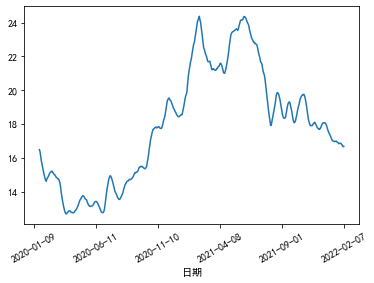

In [118]:
y_SMA.plot(rot=30)

In [119]:
data1["收盘"].rolling(10).mean()

日期
2020-01-09       NaN
2020-01-10       NaN
2020-01-13       NaN
2020-01-14       NaN
2020-01-15       NaN
               ...  
2022-01-25    16.828
2022-01-26    16.793
2022-01-27    16.725
2022-01-28    16.675
2022-02-07    16.692
Name: 收盘, Length: 501, dtype: float64

<AxesSubplot:xlabel='日期'>

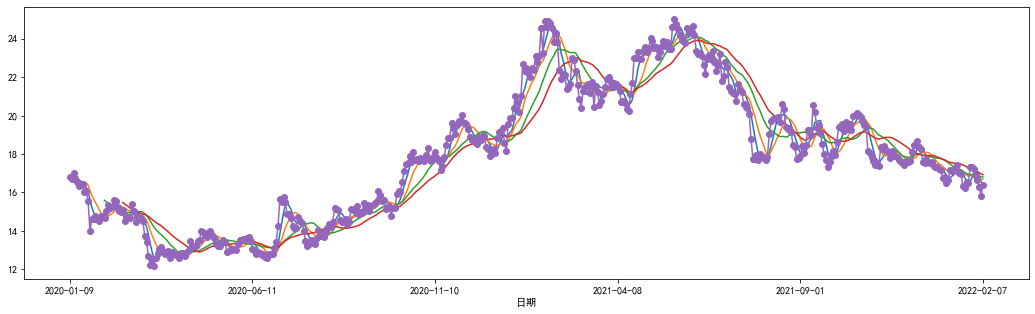

In [123]:
data1["收盘"].rolling(5).mean().plot(figsize=(18,5))
data1["收盘"].rolling(10).mean().plot()
data1["收盘"].rolling(20).mean().plot()
data1["收盘"].rolling(30).mean().plot()
data1["收盘"].plot(style="-o")

* pyecharts可视化

In [111]:
from pyecharts.charts import Line

In [125]:
#y_SMA.index.tolist()

In [126]:
c1=Line()
c1.add_xaxis(y_SMA.index.tolist())
c1.add_yaxis("MA10",y_SMA.values.tolist(),
        linestyle_opts=opts.LineStyleOpts(opacity=0.5),
        label_opts=opts.LabelOpts(is_show=False),
    )
c1.render_notebook()

In [127]:
y_SMA20=talib.SMA(data1["收盘"],20)

In [131]:
c3=Line()
c3.add_xaxis(y_SMA20.index.tolist())
c3.add_yaxis("MA20",y_SMA20.values.tolist(),
        linestyle_opts=opts.LineStyleOpts(opacity=0.5),
        label_opts=opts.LabelOpts(is_show=False),
    )
c3.render_notebook()

In [132]:
c=Kline()
c.add_xaxis(data1.index.tolist())
c.add_yaxis("kline", data1.values.tolist(),itemstyle_opts=opts.ItemStyleOpts(color="pink", color0="black"),)
c.set_global_opts(
        yaxis_opts=opts.AxisOpts(is_scale=True,splitarea_opts=opts.SplitAreaOpts(areastyle_opts=opts.AreaStyleOpts(opacity=1)
            )),
        xaxis_opts=opts.AxisOpts(is_scale=True),
        title_opts=opts.TitleOpts(title="Kline-基本示例"),datazoom_opts=[opts.DataZoomOpts(type_="inside"),opts.DataZoomOpts(type_="slider")]
    )
c.render_notebook()

In [133]:
c2=c.overlap(c1)
c4=c2.overlap(c3)

In [134]:
c4.render_notebook()

## classwork 3

* 分布用两种方式做出中国联通的20日均线和10日均线图

* 在pyechart的图中把两个均线图叠加到之前的k线图中去